In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### LOADING THE VOICE DATA FOR VISUALIZATION ###
#walley_sample = "audio_data/audio_data_1.wav"
#data, sample_rate = librosa.load(walley_sample)

##### VISUALIZING WAVE FORM ##
#plt.title("Wave Form")
#librosa.display.waveplot(data, sr=sample_rate)
#plt.show()

##### VISUALIZING MFCC #######
#mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
#print("Shape of mfcc:", mfccs.shape)

#plt.title("MFCC")
#librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
#plt.show()

##### Doing this for every sample ##

all_data = []

data_path_dict = {
    0: ["background_sound/" + file_path for file_path in os.listdir("background_sound/")],
    1: ["audio_data/" + file_path for file_path in os.listdir("audio_data/")]
}

# the background_sound/ directory has all sounds which DOES NOT CONTAIN wake word
# the audio_data/ directory has all sound WHICH HAS Wake word

for class_label, list_of_files in data_path_dict.items():
    for single_file in list_of_files:
        audio, sample_rate = librosa.load(single_file) ## Loading file
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40) ## Apllying mfcc
        mfcc_processed = np.mean(mfcc.T, axis=0) ## some pre-processing
        all_data.append([mfcc_processed, class_label])
    print(f"Info: Succesfully Preprocessed Class Label {class_label}")

df = pd.DataFrame(all_data, columns=["feature", "class_label"])

###### SAVING FOR FUTURE USE ###
df.to_pickle("final_audio_data_csv/audio_data.csv")

Info: Succesfully Preprocessed Class Label 0
Info: Succesfully Preprocessed Class Label 1


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix, classification_report
#from plot_cm import plot_confusion_matrix

##### Loading saved csv ##############
df = pd.read_pickle("final_audio_data_csv/audio_data.csv")

####### Making our data training-ready
X = df["feature"].values
X = np.concatenate(X, axis=0).reshape(len(X), 40)

y = np.array(df["class_label"].tolist())
y = to_categorical(y)

####### train test split ############
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Training ############

model_WWD = Sequential([
    Dense(256, input_shape=X_train[0].shape),
    Activation('relu'),
    Dropout(0.5),
    Dense(256),
    Activation('relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

print(model_WWD.summary())

model_WWD.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

print("Model Score: \n")
#history = model_WWD.fit(X_train, y_train, epochs=1000)
history = model_WWD.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=64)
score_CNN = model_WWD.evaluate(X_test, y_test)


#### Evaluating our model ###########
#print("Model Classification Report: \n")
#y_pred = np.argmax(model.predict(X_test), axis=1)
#cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
#print(classification_report(np.argmax(y_test, axis=1), y_pred))
#plot_confusion_matrix(cm, classes=["Does not have Wake Word", "Has Wake Word"])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 256)               10496     
                                                                 
 activation_12 (Activation)  (None, 256)               0         
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               65792     
                                                                 
 activation_13 (Activation)  (None, 256)               0         
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 2)                

Epoch 49/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.9256 - accuracy: 0.7897 - val_loss: 0.2447 - val_accuracy: 0.9048
Epoch 50/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7197 - accuracy: 0.8214 - val_loss: 0.2398 - val_accuracy: 0.9048
Epoch 51/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.6599 - accuracy: 0.8254 - val_loss: 0.2378 - val_accuracy: 0.9206
Epoch 52/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6873 - accuracy: 0.8095 - val_loss: 0.2335 - val_accuracy: 0.9048
Epoch 53/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.8115 - accuracy: 0.8135 - val_loss: 0.2317 - val_accuracy: 0.9048
Epoch 54/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.8410 - accuracy: 0.7540 - val_loss: 0.2316 - val_accuracy: 0.9048
Epoch 55/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.9699 - accuracy: 0.7817 - val_loss: 0.2362 - val_accuracy: 0.9048
Epoch 56/

Epoch 107/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3638 - accuracy: 0.8730 - val_loss: 0.2118 - val_accuracy: 0.9048
Epoch 108/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3065 - accuracy: 0.8929 - val_loss: 0.2095 - val_accuracy: 0.9206
Epoch 109/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3219 - accuracy: 0.8730 - val_loss: 0.2056 - val_accuracy: 0.9365
Epoch 110/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2208 - accuracy: 0.9048 - val_loss: 0.2024 - val_accuracy: 0.9365
Epoch 111/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3353 - accuracy: 0.8810 - val_loss: 0.1979 - val_accuracy: 0.9206
Epoch 112/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3916 - accuracy: 0.8571 - val_loss: 0.1968 - val_accuracy: 0.9365
Epoch 113/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.3195 - accuracy: 0.8770 - val_loss: 0.2016 - val_accuracy: 0.9365

4/4 [==============================] - 0s 9ms/step - loss: 0.2171 - accuracy: 0.9087 - val_loss: 0.1864 - val_accuracy: 0.9206
Epoch 165/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1992 - accuracy: 0.9167 - val_loss: 0.1860 - val_accuracy: 0.9206
Epoch 166/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2061 - accuracy: 0.9246 - val_loss: 0.1756 - val_accuracy: 0.9206
Epoch 167/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2029 - accuracy: 0.9087 - val_loss: 0.1688 - val_accuracy: 0.9048
Epoch 168/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1901 - accuracy: 0.9325 - val_loss: 0.1682 - val_accuracy: 0.9048
Epoch 169/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1343 - accuracy: 0.9484 - val_loss: 0.1668 - val_accuracy: 0.9365
Epoch 170/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2008 - accuracy: 0.9246 - val_loss: 0.1682 - val_accuracy: 0.9048
Epoch 171/1000
4/

4/4 [==============================] - 0s 10ms/step - loss: 0.1626 - accuracy: 0.9524 - val_loss: 0.1695 - val_accuracy: 0.9048
Epoch 222/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1724 - accuracy: 0.9405 - val_loss: 0.1745 - val_accuracy: 0.9048
Epoch 223/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1585 - accuracy: 0.9325 - val_loss: 0.1740 - val_accuracy: 0.9048
Epoch 224/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1305 - accuracy: 0.9365 - val_loss: 0.1736 - val_accuracy: 0.9048
Epoch 225/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1673 - accuracy: 0.9444 - val_loss: 0.1709 - val_accuracy: 0.9048
Epoch 226/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1696 - accuracy: 0.9405 - val_loss: 0.1668 - val_accuracy: 0.9048
Epoch 227/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1553 - accuracy: 0.9405 - val_loss: 0.1640 - val_accuracy: 0.9048
Epoch 228/1000
4/4

4/4 [==============================] - 0s 11ms/step - loss: 0.0884 - accuracy: 0.9603 - val_loss: 0.1858 - val_accuracy: 0.9048
Epoch 279/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1196 - accuracy: 0.9524 - val_loss: 0.1881 - val_accuracy: 0.9048
Epoch 280/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1144 - accuracy: 0.9524 - val_loss: 0.1938 - val_accuracy: 0.9048
Epoch 281/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1499 - accuracy: 0.9365 - val_loss: 0.1834 - val_accuracy: 0.9048
Epoch 282/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1039 - accuracy: 0.9603 - val_loss: 0.1793 - val_accuracy: 0.9048
Epoch 283/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0867 - accuracy: 0.9524 - val_loss: 0.1756 - val_accuracy: 0.9048
Epoch 284/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1318 - accuracy: 0.9563 - val_loss: 0.1827 - val_accuracy: 0.9048
Epoch 285/1000
4

4/4 [==============================] - 0s 11ms/step - loss: 0.0518 - accuracy: 0.9802 - val_loss: 0.2085 - val_accuracy: 0.9048
Epoch 336/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0549 - accuracy: 0.9802 - val_loss: 0.2157 - val_accuracy: 0.9048
Epoch 337/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1163 - accuracy: 0.9603 - val_loss: 0.2191 - val_accuracy: 0.9048
Epoch 338/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0671 - accuracy: 0.9802 - val_loss: 0.2161 - val_accuracy: 0.9048
Epoch 339/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0741 - accuracy: 0.9722 - val_loss: 0.2086 - val_accuracy: 0.9048
Epoch 340/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0688 - accuracy: 0.9762 - val_loss: 0.2106 - val_accuracy: 0.9048
Epoch 341/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0974 - accuracy: 0.9643 - val_loss: 0.2150 - val_accuracy: 0.9048
Epoch 342/1000
4/4 

4/4 [==============================] - 0s 10ms/step - loss: 0.0522 - accuracy: 0.9802 - val_loss: 0.2509 - val_accuracy: 0.9206
Epoch 393/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0575 - accuracy: 0.9802 - val_loss: 0.2567 - val_accuracy: 0.9206
Epoch 394/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0841 - accuracy: 0.9643 - val_loss: 0.2592 - val_accuracy: 0.9365
Epoch 395/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0453 - accuracy: 0.9881 - val_loss: 0.2408 - val_accuracy: 0.9206
Epoch 396/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0648 - accuracy: 0.9762 - val_loss: 0.2204 - val_accuracy: 0.9206
Epoch 397/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0706 - accuracy: 0.9762 - val_loss: 0.2150 - val_accuracy: 0.9048
Epoch 398/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0452 - accuracy: 0.9881 - val_loss: 0.2188 - val_accuracy: 0.9206
Epoch 399/1000
4/

4/4 [==============================] - 0s 10ms/step - loss: 0.0666 - accuracy: 0.9881 - val_loss: 0.3290 - val_accuracy: 0.9206
Epoch 450/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0408 - accuracy: 0.9802 - val_loss: 0.3073 - val_accuracy: 0.9206
Epoch 451/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0488 - accuracy: 0.9841 - val_loss: 0.2894 - val_accuracy: 0.9206
Epoch 452/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0388 - accuracy: 0.9881 - val_loss: 0.2786 - val_accuracy: 0.9206
Epoch 453/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0311 - accuracy: 0.9881 - val_loss: 0.2708 - val_accuracy: 0.9206
Epoch 454/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0323 - accuracy: 0.9841 - val_loss: 0.2687 - val_accuracy: 0.9206
Epoch 455/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0214 - accuracy: 0.9960 - val_loss: 0.2713 - val_accuracy: 0.9206
Epoch 456/1000
4/

4/4 [==============================] - 0s 11ms/step - loss: 0.0265 - accuracy: 0.9921 - val_loss: 0.3324 - val_accuracy: 0.9206
Epoch 507/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0337 - accuracy: 0.9841 - val_loss: 0.3275 - val_accuracy: 0.9206
Epoch 508/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0172 - accuracy: 0.9921 - val_loss: 0.3263 - val_accuracy: 0.9206
Epoch 509/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0671 - accuracy: 0.9802 - val_loss: 0.3216 - val_accuracy: 0.9206
Epoch 510/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0468 - accuracy: 0.9762 - val_loss: 0.3078 - val_accuracy: 0.9365
Epoch 511/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0163 - accuracy: 0.9960 - val_loss: 0.3123 - val_accuracy: 0.9365
Epoch 512/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0281 - accuracy: 0.9881 - val_loss: 0.3198 - val_accuracy: 0.9365
Epoch 513/1000
4/

4/4 [==============================] - 0s 11ms/step - loss: 0.0168 - accuracy: 0.9881 - val_loss: 0.3736 - val_accuracy: 0.9206
Epoch 564/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0277 - accuracy: 0.9921 - val_loss: 0.3604 - val_accuracy: 0.9206
Epoch 565/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0114 - accuracy: 0.9921 - val_loss: 0.3518 - val_accuracy: 0.9206
Epoch 566/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0284 - accuracy: 0.9881 - val_loss: 0.3493 - val_accuracy: 0.9365
Epoch 567/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0202 - accuracy: 0.9921 - val_loss: 0.3653 - val_accuracy: 0.9206
Epoch 568/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3869 - val_accuracy: 0.9206
Epoch 569/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0164 - accuracy: 0.9960 - val_loss: 0.3973 - val_accuracy: 0.9206
Epoch 570/1000
4/4

4/4 [==============================] - 0s 11ms/step - loss: 0.0157 - accuracy: 0.9960 - val_loss: 0.4685 - val_accuracy: 0.9206
Epoch 621/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0116 - accuracy: 0.9960 - val_loss: 0.4348 - val_accuracy: 0.9206
Epoch 622/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0186 - accuracy: 0.9881 - val_loss: 0.4355 - val_accuracy: 0.9206
Epoch 623/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.4543 - val_accuracy: 0.9206
Epoch 624/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0248 - accuracy: 0.9960 - val_loss: 0.4631 - val_accuracy: 0.9206
Epoch 625/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0140 - accuracy: 0.9960 - val_loss: 0.4859 - val_accuracy: 0.9206
Epoch 626/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.4932 - val_accuracy: 0.9206
Epoch 627/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.0161 - accuracy: 0.9921 - val_loss: 0.4026 - val_accuracy: 0.9365
Epoch 678/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.4101 - val_accuracy: 0.9365
Epoch 679/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.4012 - val_accuracy: 0.9365
Epoch 680/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0202 - accuracy: 0.9960 - val_loss: 0.3844 - val_accuracy: 0.9365
Epoch 681/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.3798 - val_accuracy: 0.9206
Epoch 682/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0110 - accuracy: 0.9960 - val_loss: 0.3861 - val_accuracy: 0.9206
Epoch 683/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0130 - accuracy: 0.9960 - val_loss: 0.3879 - val_accuracy: 0.9206
Epoch 684/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.0163 - accuracy: 0.9960 - val_loss: 0.4804 - val_accuracy: 0.9206
Epoch 735/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0079 - accuracy: 0.9960 - val_loss: 0.5125 - val_accuracy: 0.9365
Epoch 736/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 0.5657 - val_accuracy: 0.9365
Epoch 737/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0066 - accuracy: 0.9960 - val_loss: 0.5815 - val_accuracy: 0.9365
Epoch 738/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.5314 - val_accuracy: 0.9206
Epoch 739/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.4755 - val_accuracy: 0.9206
Epoch 740/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0078 - accuracy: 0.9960 - val_loss: 0.4597 - val_accuracy: 0.9365
Epoch 741/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4380 - val_accuracy: 0.9206
Epoch 792/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0287 - accuracy: 0.9921 - val_loss: 0.4571 - val_accuracy: 0.9206
Epoch 793/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.4930 - val_accuracy: 0.9206
Epoch 794/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.5063 - val_accuracy: 0.9206
Epoch 795/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.5113 - val_accuracy: 0.9206
Epoch 796/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0149 - accuracy: 0.9960 - val_loss: 0.5129 - val_accuracy: 0.9365
Epoch 797/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0077 - accuracy: 0.9960 - val_loss: 0.5044 - val_accuracy: 0.9365
Epoch 798/1000

4/4 [==============================] - 0s 12ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4587 - val_accuracy: 0.9365
Epoch 849/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.4357 - val_accuracy: 0.9365
Epoch 850/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0064 - accuracy: 0.9960 - val_loss: 0.4240 - val_accuracy: 0.9365
Epoch 851/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4208 - val_accuracy: 0.9206
Epoch 852/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0099 - accuracy: 0.9960 - val_loss: 0.4299 - val_accuracy: 0.9206
Epoch 853/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0102 - accuracy: 0.9960 - val_loss: 0.4441 - val_accuracy: 0.9206
Epoch 854/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0061 - accuracy: 0.9960 - val_loss: 0.4499 - val_accuracy: 0.9206
Epoch 855/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.3979 - val_accuracy: 0.9206
Epoch 906/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.3937 - val_accuracy: 0.9048
Epoch 907/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4153 - val_accuracy: 0.9206
Epoch 908/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.4322 - val_accuracy: 0.9206
Epoch 909/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0161 - accuracy: 0.9960 - val_loss: 0.4544 - val_accuracy: 0.9206
Epoch 910/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4736 - val_accuracy: 0.9206
Epoch 911/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0098 - accuracy: 0.9960 - val_loss: 0.4824 - val_accuracy: 0.9206
Epoch 912/1000


4/4 [==============================] - 0s 10ms/step - loss: 0.0177 - accuracy: 0.9881 - val_loss: 0.5658 - val_accuracy: 0.9206
Epoch 963/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.7286 - val_accuracy: 0.9206
Epoch 964/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0178 - accuracy: 0.9960 - val_loss: 0.7165 - val_accuracy: 0.9365
Epoch 965/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0090 - accuracy: 0.9960 - val_loss: 0.6671 - val_accuracy: 0.9206
Epoch 966/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0312 - accuracy: 0.9881 - val_loss: 0.4267 - val_accuracy: 0.9206
Epoch 967/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4325 - val_accuracy: 0.9206
Epoch 968/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0263 - accuracy: 0.9881 - val_loss: 0.4651 - val_accuracy: 0.9206
Epoch 969/1000

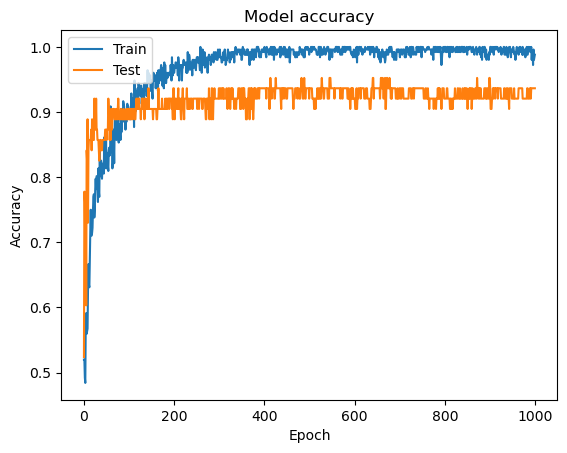

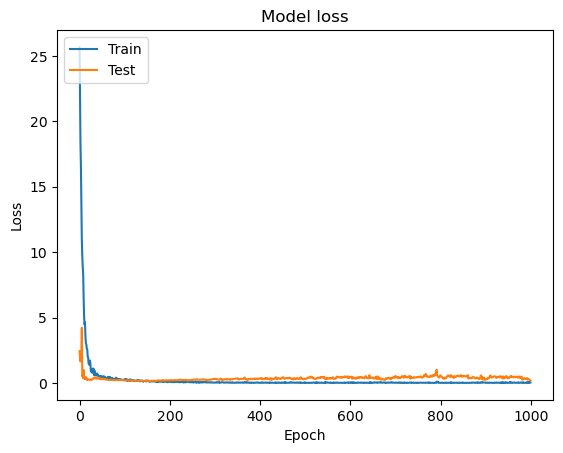

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [5]:
model_ANN = Sequential([
    Dense(256, input_shape=X_train[0].shape),
    Activation('relu'),
    Dropout(0.5),
    Dense(256),
    Activation('relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

print(model_ANN.summary())

model_ANN.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

print("Model Score: \n")
history = model_ANN.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)
score_ANN = model_ANN.evaluate(X_test, y_test)
print(score)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               10496     
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                

Epoch 50/50
2/2 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9048


NameError: name 'score' is not defined

In [6]:
##### Training ############

model_DNN = Sequential([
    Dense(256, input_shape=X_train[0].shape),
    Activation('relu'),
    Dropout(0.5),
    Dense(256),
    Activation('relu'),
    Dropout(0.5),
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(64),
    Activation('relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

print(model_DNN.summary())

model_DNN.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

print("Model Score: \n")
history = model_DNN.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, batch_size=32)
score_DNN = model_DNN.evaluate(X_test, y_test)
print(score)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               10496     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

Epoch 44/250
8/8 [==============================] - 0s 8ms/step - loss: 0.8854 - accuracy: 0.5437 - val_loss: 0.6925 - val_accuracy: 0.5238
Epoch 45/250
8/8 [==============================] - 0s 6ms/step - loss: 0.8818 - accuracy: 0.5437 - val_loss: 0.6927 - val_accuracy: 0.5238
Epoch 46/250
8/8 [==============================] - 0s 5ms/step - loss: 0.9278 - accuracy: 0.5119 - val_loss: 0.6924 - val_accuracy: 0.5238
Epoch 47/250
8/8 [==============================] - 0s 5ms/step - loss: 0.9677 - accuracy: 0.5397 - val_loss: 0.6921 - val_accuracy: 0.5238
Epoch 48/250
8/8 [==============================] - 0s 6ms/step - loss: 0.8714 - accuracy: 0.4762 - val_loss: 0.6923 - val_accuracy: 0.5238
Epoch 49/250
8/8 [==============================] - 0s 5ms/step - loss: 0.8896 - accuracy: 0.5714 - val_loss: 0.6922 - val_accuracy: 0.5238
Epoch 50/250
8/8 [==============================] - 0s 6ms/step - loss: 0.8242 - accuracy: 0.5516 - val_loss: 0.6930 - val_accuracy: 0.3810
Epoch 51/250
8/8 [==

8/8 [==============================] - 0s 7ms/step - loss: 0.7165 - accuracy: 0.4960 - val_loss: 0.6909 - val_accuracy: 0.5238
Epoch 103/250
8/8 [==============================] - 0s 6ms/step - loss: 0.7346 - accuracy: 0.5238 - val_loss: 0.6915 - val_accuracy: 0.5238
Epoch 104/250
8/8 [==============================] - 0s 6ms/step - loss: 0.7093 - accuracy: 0.4960 - val_loss: 0.6917 - val_accuracy: 0.5238
Epoch 105/250
8/8 [==============================] - 0s 6ms/step - loss: 0.7274 - accuracy: 0.5198 - val_loss: 0.6913 - val_accuracy: 0.5238
Epoch 106/250
8/8 [==============================] - 0s 6ms/step - loss: 0.7244 - accuracy: 0.5198 - val_loss: 0.6917 - val_accuracy: 0.5238
Epoch 107/250
8/8 [==============================] - 0s 6ms/step - loss: 0.7541 - accuracy: 0.4802 - val_loss: 0.6906 - val_accuracy: 0.5238
Epoch 108/250
8/8 [==============================] - 0s 6ms/step - loss: 0.7292 - accuracy: 0.5119 - val_loss: 0.6901 - val_accuracy: 0.5238
Epoch 109/250
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 0.6883 - accuracy: 0.5714 - val_loss: 0.6836 - val_accuracy: 0.5238
Epoch 161/250
8/8 [==============================] - 0s 7ms/step - loss: 0.7076 - accuracy: 0.4365 - val_loss: 0.6846 - val_accuracy: 0.5238
Epoch 162/250
8/8 [==============================] - 0s 6ms/step - loss: 0.7060 - accuracy: 0.5317 - val_loss: 0.6843 - val_accuracy: 0.5238
Epoch 163/250
8/8 [==============================] - 0s 6ms/step - loss: 0.7037 - accuracy: 0.5476 - val_loss: 0.6827 - val_accuracy: 0.5238
Epoch 164/250
8/8 [==============================] - 0s 6ms/step - loss: 0.7139 - accuracy: 0.4960 - val_loss: 0.6834 - val_accuracy: 0.5238
Epoch 165/250
8/8 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5675 - val_loss: 0.6841 - val_accuracy: 0.5238
Epoch 166/250
8/8 [==============================] - 0s 6ms/step - loss: 0.7118 - accuracy: 0.5675 - val_loss: 0.6845 - val_accuracy: 0.5238
Epoch 167/250
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.5459 - accuracy: 0.7262 - val_loss: 0.4392 - val_accuracy: 0.8571
Epoch 219/250
8/8 [==============================] - 0s 6ms/step - loss: 0.5469 - accuracy: 0.7183 - val_loss: 0.4156 - val_accuracy: 0.8730
Epoch 220/250
8/8 [==============================] - 0s 6ms/step - loss: 0.6152 - accuracy: 0.6548 - val_loss: 0.4221 - val_accuracy: 0.8571
Epoch 221/250
8/8 [==============================] - 0s 6ms/step - loss: 0.5423 - accuracy: 0.7143 - val_loss: 0.4315 - val_accuracy: 0.8571
Epoch 222/250
8/8 [==============================] - 0s 5ms/step - loss: 0.5653 - accuracy: 0.6984 - val_loss: 0.4458 - val_accuracy: 0.8571
Epoch 223/250
8/8 [==============================] - 0s 5ms/step - loss: 0.5735 - accuracy: 0.7063 - val_loss: 0.4322 - val_accuracy: 0.8730
Epoch 224/250
8/8 [==============================] - 0s 5ms/step - loss: 0.5834 - accuracy: 0.6905 - val_loss: 0.4218 - val_accuracy: 0.8889
Epoch 225/250
8/8 [========

NameError: name 'score' is not defined

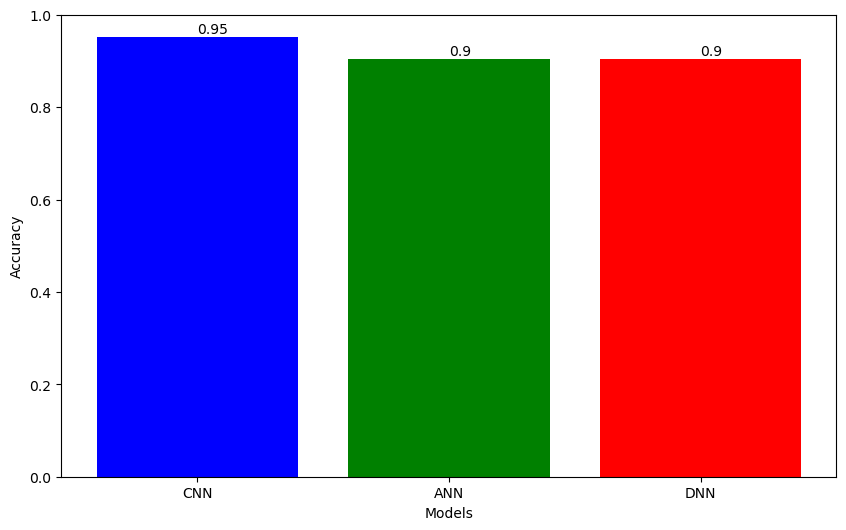

In [19]:
import matplotlib.pyplot as plt

# Accuracy scores of each model
accuracy_scores = {
    "CNN": score_CNN[1],  # Accuracy score of model_WWD
    "ANN": score_ANN[1],  # Accuracy score of model_ANN
    "DNN": score_DNN[1]   # Accuracy score of model_DNN
}

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
#plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 (for accuracy)

# Adding text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()
